<a href="https://colab.research.google.com/github/mr-usurper/aura_vis/blob/main/aura_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#file = pd.read_excel('/content/sample_data/test(1).xlsx')
file = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vTgfBgVCm1sX66JHzRB02AVqa9hUfSTas2Ydr7AYJCo6aWUMZHWup0PV1go8RfZkjsDKvV1prHYZCVo/pub?output=xlsx')

### ACTUAL DATASHEET

sad = file['sadness'] 
anger = file['anger'] 
tired = file['tiredness'] 
exc = file['excitement'] 
grateful = file['gratefulness'] 
calm = file['calmness']

file

,Timestamp,sadness,anger,tiredness,excitement,gratefulness,calmness
0,2023-04-19 11:13:55.058,3,1,2,8,7,5


In [ ]:
avg_s = sad.mean()
avg_a = anger.mean()
avg_t = tired.mean()
avg_e = exc.mean()
avg_g = grateful.mean()
avg_c = calm.mean()

avgs = []
avgs.append(avg_s)
avgs.append(avg_a)
avgs.append(avg_t)
avgs.append(avg_e)
avgs.append(avg_g)
avgs.append(avg_c)

avgs_neg = []
avgs_neg.append(avg_s)
avgs_neg.append(avg_a)
avgs_neg.append(avg_t)
avgs_pos = []
avgs_pos.append(avg_e)
avgs_pos.append(avg_g)
avgs_pos.append(avg_c)

top1 = avgs_pos.index(max(avgs_pos))
top2 = avgs_pos.index(max([a for i,a in enumerate(avgs_pos) if a<max(avgs_pos)]))
bottom1 = avgs_neg.index(max(avgs_neg))

colors = []
colors.append([165, 201, 253]) 
colors.append([255, 105, 97])
colors.append([192, 176, 209])
colors.append([253, 253, 150])
colors.append([254, 0, 197])
colors.append([150, 239, 181])
#darker
colors.append([97, 163, 255]) 
colors.append([200, 0, 0])
colors.append([152, 126, 180])
colors.append([253, 253, 0])
colors.append([179, 0, 121])
colors.append([0, 239, 181])
#brighter
colors.append([205, 225, 254]) 
colors.append([255, 153, 153])
colors.append([216, 207, 227])
colors.append([253, 253, 220])
colors.append([255, 179, 238])
colors.append([200, 255, 200])

# 165, 201, 253 blue 0 
# 255, 105, 97 red 1 
# 192, 176, 209 purple 2 
# 253, 253, 150 yellow 3 
# 245, 174, 190 pink 4
# 150, 239, 181 green 5

avgs

[3.0, 1.0, 2.0, 8.0, 7.0, 5.0]

In [ ]:
#mood1_ratio = avgs[top1]/(sum(avgs))*100
#mood2_ratio = avgs[top2]/(sum(avgs))*100

mood1_ratio = avgs_pos[top1]
mood2_ratio = avgs_pos[top2]

coef = mood1_ratio/mood2_ratio

mood1_avg = avgs_pos[top1]
mood2_avg = avgs_pos[top2]
mood2_value = int((100/(coef+1))//1)
mood1_value = 100-mood2_value

PN_coef = sum(avgs_neg)/sum(avgs_pos)


PN_coef

0.3

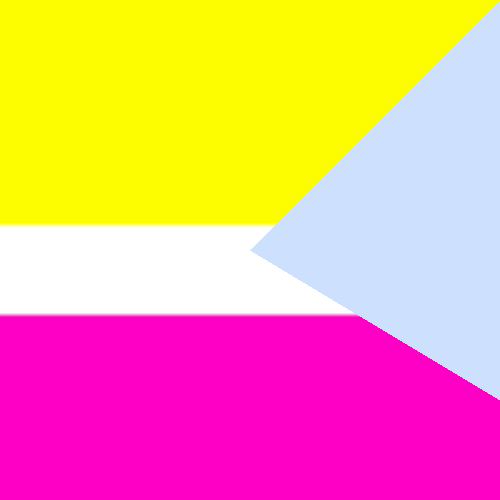

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageDraw
import random

w = 100
h = 100
mood1 = mood1_value
mood2 = mood2_value
i = 0
j = 0
grd = 9

array = np.zeros([h, w, 3], dtype=np.uint8)
clr1 = 0
for i in range(0, mood1-grd):
  for j in range(w):
    clr1 = top1+3
    if avgs[clr1] < 10 and avgs[clr1] >= 8:
      array[i,j] = colors[clr1+6]
    elif avgs[clr1] < 8 and avgs[clr1] >= 5:
      array[i,j] = colors[clr1] 
    elif avgs[clr1] < 5 and avgs[clr1] > 0:
      array[i,j] = colors[clr1+12]

for i in range (mood1-grd, mood1+grd):
  for j in range(w):
    array[i,j] = [255, 255, 255]

clr = 0
for i in range(mood1+grd, h):
  for j in range(w):
    clr = top2+3
    if avgs[clr] < 10 and avgs[clr] >= 8:
      array[i,j] = colors[clr+6]
    elif avgs[clr] < 8 and avgs[clr] >= 5:
      array[i,j] = colors[clr] 
    elif avgs[clr] < 5 and avgs[clr] > 0:
      array[i,j] = colors[clr+12]

img = Image.fromarray(array)
scale = 5
scaled = img.resize((w*scale, h*scale))

if avgs[bottom1] < 10 and avgs[bottom1] >= 8:
  clr = bottom1 + 6
elif avgs[bottom1] < 8 and avgs[bottom1] >= 5:
  clr = bottom1
elif avgs[bottom1] < 5 and avgs[bottom1] > 0:
  clr = bottom1 + 12
  
draw = ImageDraw.Draw(scaled)
pos = random.randint(0,1)

if pos == 0:
  if PN_coef > 1:
    draw.polygon(((w*scale-250, 0), (w*scale, 0), (w*scale, w*scale-50), (w*scale-150, w*scale-100), (w*scale-350, w*scale/2)), fill=(tuple(colors[clr])))
  elif PN_coef < 1 and PN_coef >= 0.7:
    draw.polygon(((w*scale, 0), (w*scale, w*scale-100), (w*scale-250, w*scale/2)), fill=(tuple(colors[clr])))
    draw.ellipse((-50, 350, 150, 550), fill=(tuple(colors[clr])))
  elif PN_coef < 0.7 and PN_coef > 0:
    draw.polygon(((w*scale, 0), (w*scale, w*scale-100), (w*scale-250, w*scale/2)), fill=(tuple(colors[clr])))

if pos == 1:
  if PN_coef > 1:
    draw.polygon(((250, 0), (0, 0), (0, w*scale-50), (150, w*scale-100), (350, w*scale/2)), fill=(tuple(colors[clr])))
  elif PN_coef < 1 and PN_coef >= 0.7:
    draw.ellipse((350, 350, 550, 550), fill=(tuple(colors[clr])))
    draw.polygon(((0, 0), (0, w*scale-100), (w*scale-250, w*scale/2)), fill=(tuple(colors[clr])))
  elif PN_coef < 0.7 and PN_coef > 0:
    draw.polygon(((0, 0), (0, w*scale-100), (w*scale-250, w*scale/2)), fill=(tuple(colors[clr])))


scaled

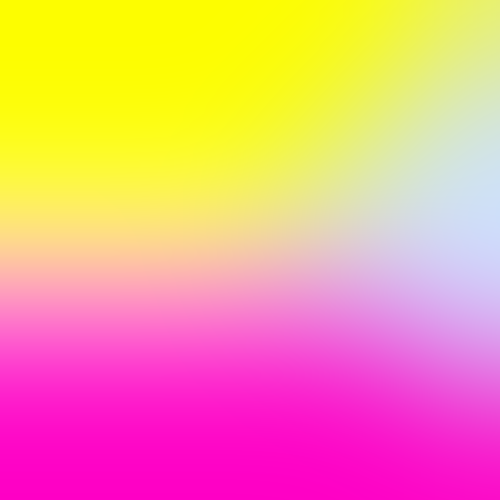

In [ ]:
blurImage = scaled.filter(ImageFilter.GaussianBlur(70))

blurImage